In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "./Datasets/"

In [3]:
log_df = pd.read_parquet(path + "logs.parquet")

In [4]:
log_df.head(10)

,resp_time,bytes_sent,resp_code,url,datetime,app_1_containers,app_2_containers,app_3_containers,app_4_containers
0,0.031,197,200,/2/4-3/65,2019-09-05 22:37:10,3,3,3,3
1,0.380,198,200,/3/3-4/37,2019-09-05 22:37:10,3,3,3,3
2,0.298,188,200,/4/3/188,2019-09-05 22:37:11,3,3,3,3
3,0.009,188,200,/3/3/180,2019-09-05 22:37:11,3,3,3,3
4,0.331,199,200,/3/3-4/115,2019-09-05 22:37:11,3,3,3,3
5,0.148,229,200,/3/3-3-3-3-3/101,2019-09-05 22:37:11,3,3,3,3
6,0.023,188,200,/3/3/180,2019-09-05 22:37:11,3,3,3,3
7,0.298,189,200,/4/3/188,2019-09-05 22:37:11,3,3,3,3
8,0.027,207,200,/3/4-2-2/38,2019-09-05 22:37:11,3,3,3,3
9,0.352,210,200,/3/4-4-3/60,2019-09-05 22:37:11,3,3,3,3


In [5]:
# Feature transformations

# Convert resp_time and bytes_setn into float

log_df.resp_time = log_df.resp_time.astype("float")
log_df.bytes_sent = log_df.bytes_sent.astype("float")

# Convert datetime string into Pandas Datetime

log_df.datetime = pd.to_datetime(log_df.datetime,
                                    format="%Y-%m-%d %H:%M:%S")

# Create categorical variables
'''
log_df = pd.get_dummies(log_df, columns = ['resp_code'])
log_df = pd.get_dummies(log_df, columns = ['url'])
'''

"\nlog_df = pd.get_dummies(log_df, columns = ['resp_code'])\nlog_df = pd.get_dummies(log_df, columns = ['url'])\n"

In [6]:
log_df.tail(10)

,resp_time,bytes_sent,resp_code,url,datetime,app_1_containers,app_2_containers,app_3_containers,app_4_containers
4483527,9.730,231.0,200,/4/3-3-3-3-3/181,2019-09-11 12:31:41,2,6,2,6
4483528,23.339,211.0,200,/4/3-4-3/96,2019-09-11 12:31:41,2,6,2,6
4483529,5.395,209.0,200,/3/4-4-3/163,2019-09-11 12:31:41,2,6,2,6
4483530,0.256,188.0,200,/3/2/158,2019-09-11 12:31:41,2,6,2,6
4483531,22.063,219.0,200,/3/2-3-3-2/107,2019-09-11 12:31:41,2,6,2,6
4483532,0.375,188.0,200,/4/4/223,2019-09-11 12:31:41,2,6,2,6
4483533,10.613,219.0,200,/3/3-3-3-4/9,2019-09-11 12:31:41,2,6,2,6
4483534,0.649,189.0,200,/4/3/169,2019-09-11 12:31:41,2,6,2,6
4483535,22.602,220.0,200,/4/4-4-3-4/16,2019-09-11 12:31:41,2,6,2,6
4483536,17.200,217.0,200,/2/2-2-3-2/126,2019-09-11 12:31:41,2,6,2,6


In [7]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4483537 entries, 0 to 4483536
Columns: 143 entries, resp_time to url_/4/4/79
dtypes: datetime64[ns](1), float64(2), int64(4), uint8(136)
memory usage: 821.0 MB


In [8]:
log_df.shape

(4483537, 143)

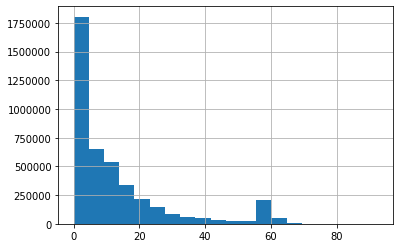

In [7]:
log_df.resp_time.hist(bins=20)

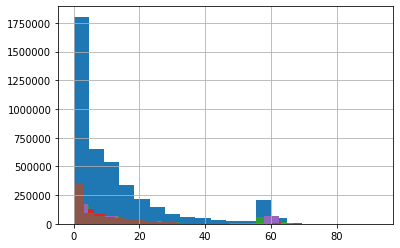

In [9]:
# EDA response time

log_df.resp_time.hist(bins=20)

# Compare response time where all apps where replicated 3X to where only one was

log_df["all_x_3"] = (log_df.app_1_containers == 3) & (log_df.app_2_containers == 3) & (log_df.app_3_containers == 3) & (log_df.app_4_containers == 3)

log_df["2_x_3"] = (log_df.app_1_containers == 1) & (log_df.app_2_containers == 3) & (log_df.app_3_containers == 1) & (log_df.app_4_containers == 1)

log_df["3_x_3"] = (log_df.app_1_containers == 1) & (log_df.app_2_containers == 1) & (log_df.app_3_containers == 3) & (log_df.app_4_containers == 1)

log_df["3_x_3"] = (log_df.app_1_containers == 1) & (log_df.app_2_containers == 1) & (log_df.app_3_containers == 3) & (log_df.app_4_containers == 1)

log_df["4_x_3"] = (log_df.app_1_containers == 1) & (log_df.app_2_containers == 1) & (log_df.app_3_containers == 1) & (log_df.app_4_containers == 4)

log_df["23_x_6"] = (log_df.app_1_containers == 2) & (log_df.app_2_containers == 6) & (log_df.app_3_containers == 6) & (log_df.app_4_containers == 2)

log_df["2_x_3"].value_counts()

log_df["3_x_3"].value_counts()

log_df["4_x_3"].value_counts()

log_df["23_x_6"].value_counts()

log_df["all_x_3"].value_counts()

log_df[log_df["all_x_3"] == True].resp_time.hist(bins=20)

log_df[log_df["2_x_3"] == True].resp_time.hist(bins=20)

log_df[log_df["3_x_3"] == True].resp_time.hist(bins=20)

log_df[log_df["4_x_3"] == True].resp_time.hist(bins=20)

log_df[log_df["23_x_6"] == True].resp_time.hist(bins=20)

In [10]:
# What about errors

(log_df.resp_time.isna().sum() / (len(log_df))) * 100

# 5% error rate overall. What is the distribution over container patterns?

5.200247037104857

In [11]:
log_df.columns.tolist()

['resp_time',
 'bytes_sent',
 'datetime',
 'app_1_containers',
 'app_2_containers',
 'app_3_containers',
 'app_4_containers',
 'resp_code_110',
 'resp_code_200',
 'resp_code_499',
 'resp_code_500',
 'resp_code_502',
 'resp_code_504',
 'resp_code_Connection',
 'url_/2/2-2-2-3-2/197',
 'url_/2/2-2-2-4-4/72',
 'url_/2/2-2-3-2/126',
 'url_/2/2-2-4/199',
 'url_/2/2-2/6',
 'url_/2/2-2/95',
 'url_/2/2-3-2-2-3/104',
 'url_/2/2-3/104',
 'url_/2/2/119',
 'url_/2/2/130',
 'url_/2/2/247',
 'url_/2/2/57',
 'url_/2/3-2-3-4-2/94',
 'url_/2/3-2-3/93',
 'url_/2/3-2-4-4/40',
 'url_/2/3-3-2-3/126',
 'url_/2/3-3-2/245',
 'url_/2/3-3-3-3/125',
 'url_/2/3-3-3-3/84',
 'url_/2/3-3-3/181',
 'url_/2/3-3/87',
 'url_/2/3-3/91',
 'url_/2/3-4-2-3/152',
 'url_/2/3-4-3/155',
 'url_/2/3-4-4-4-3/154',
 'url_/2/3-4/105',
 'url_/2/3-4/232',
 'url_/2/3/188',
 'url_/2/3/6',
 'url_/2/4-2-2-3-2/204',
 'url_/2/4-2-4-2/65',
 'url_/2/4-2-4/235',
 'url_/2/4-3-2-2-2/105',
 'url_/2/4-3-2-2-2/85',
 'url_/2/4-3-4-2-4/12',
 'url_/2/4